In [1]:
from transformers import BertTokenizer, BertModel, Wav2Vec2ForCTC, Wav2Vec2CTCTokenizer, Wav2Vec2Processor, AutoTokenizer

C:\Users\CET_Pc\Anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import os

In [19]:
!git clone https://github.com/facebookresearch/voxpopuli.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import tensorflow as tf
print(tf.__version__)
#import torchaudio
import sys,os
import pandas as pd
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import librosa
import librosa.display
import re

from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical

# models
from sklearn import linear_model, naive_bayes, neighbors
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
from sklearn import metrics 
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D


2.6.2


In [2]:
from scipy import stats

# Libraries for the evaluation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

In [4]:
sample_rate = 16000
def extract_feature(file_path):
    try:
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None, None
    return np.array([mfccs_processed]), np.array([len(audio)/sr])

In [3]:
# loading the labels in the second dataframe
#root = "E:/Libri/LibriSpeech/"
labels = pd.DataFrame(columns=['speaker_id1', 'gender'])

f = open("E:/Libri/LibriSpeech/SPEAKERS.txt", "r", encoding="UTF8").readlines()
i = 0
for idx, line in enumerate(f):
    if idx > 11:
        parsed = re.split('\s+',line)
        if parsed[4] == 'dev-clean':
            labels.loc[i] = parsed[0], parsed[2] # speaker_id and label (M/F)
            i += 1   

In [4]:
labels

,speaker_id1,gender
0,84,F
1,174,M
2,251,M
3,422,M
4,652,M
5,777,M
6,1272,M
7,1462,F
8,1673,F
9,1919,F


In [5]:
root = "E:/Libri/LibriSpeech/dev-clean/"
df = pd.DataFrame(columns=['speaker_id', 'features'])                 

i = 0
max_pad_len = 1021

# loading the features in the first dataframe
for path, subdirs, files in os.walk(root):
    for name in files:
        speaker_id = path.split('/')[4]
        if name.endswith(".flac"):
            sound, sample_rate = librosa.load(os.path.join(path, name), sr=16000)
            data = extract_features(sound)
            
            pad_width = max_pad_len - data.shape[1]
            data = np.pad(data, pad_width=((0,0), (0, pad_width)), mode='constant')
            df.loc[i] = [speaker_id] + [data]
            i += 1

NameError: name 'extract_features' is not defined

In [321]:
df

,speaker_id,features
0,1272,"[[-528.69946, -501.22946, -503.7977, -518.0384..."
1,1272,"[[-572.3399, -562.6875, -547.48303, -514.67474..."
2,1272,"[[-529.91327, -494.09573, -478.23132, -459.471..."
3,1272,"[[-541.216, -504.3137, -481.6609, -455.47534, ..."
4,1272,"[[-490.3293, -442.96283, -405.95102, -379.4946..."
...,...,...
2698,8842,"[[-547.88983, -539.331, -538.2709, -539.31024,..."
2699,8842,"[[-543.0658, -528.2993, -526.77045, -524.7941,..."
2700,8842,"[[-559.17914, -543.6796, -540.3683, -536.65717..."
2701,8842,"[[-564.24365, -549.39435, -546.9231, -546.1662..."


In [322]:
df["speaker_id"].replace({"84": 0, "174": 1, "251": 1,"422": 1,"652": 1,"777": 1, "1272": 1,"1462":0, "1673":0, "1919":0, "1988":0,"1993":0, "2035":0, "2078":1, "2086":1, "2277":0, "2412":0, "2428":1, "2803":1, "2902":1, "3000":1, "3081":0, "3170":1, "3536":0,"3576":0, "3752":1, "3853":0, "5338":0, "5536":1, "5694":1, "5895":0, "6241":1, "6295":1, "6313":0, "6319":0, "6345":0, "7850":0, "7976":1, "8297":1, "8842":0}, inplace=True)

In [323]:
# REPLACE CATEGORICAL VALUES INTO NUMERIC VALUES
df =df.fillna(0)
#dataset["gender"].replace({"M": 1, "F": 0}, inplace=True)
df.head(10)

,speaker_id,features
0,1,"[[-528.69946, -501.22946, -503.7977, -518.0384..."
1,1,"[[-572.3399, -562.6875, -547.48303, -514.67474..."
2,1,"[[-529.91327, -494.09573, -478.23132, -459.471..."
3,1,"[[-541.216, -504.3137, -481.6609, -455.47534, ..."
4,1,"[[-490.3293, -442.96283, -405.95102, -379.4946..."
5,1,"[[-420.6933, -391.5817, -402.1242, -425.6603, ..."
6,1,"[[-579.5069, -540.7488, -504.11133, -499.32086..."
7,1,"[[-567.024, -525.76654, -494.5746, -477.10895,..."
8,1,"[[-500.19687, -459.13394, -436.62683, -416.311..."
9,1,"[[-562.1569, -521.306, -467.74948, -429.08597,..."


In [261]:
df['speaker_id'].value_counts()

0    1374
1    1329
Name: speaker_id, dtype: int64

In [308]:
x='8842-302196-0000'
part = x.split('.')[0].split('-')
int(part[0])

8842

# 

In [6]:
root = "E:/Libri/LibriSpeech/dev-clean/"
df = pd.DataFrame(columns=['gender'])                 
file_path = []

i = 0

# loading the features in the first dataframe
for path, subdirs, files in os.walk(root):
    for name in files:
        gender = path.split('/')[4]
        if name.endswith(".flac"):
            file_path.append(path + '/' + name)
            df.loc[i] = [gender]
            i += 1

In [7]:
df = pd.concat([pd.DataFrame(file_path, columns = ['path']),df],axis=1)
df

,path,gender
0,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1272
1,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1272
2,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1272
3,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1272
4,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1272
...,...,...
2698,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,8842
2699,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,8842
2700,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,8842
2701,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,8842


In [8]:
df["gender"].replace({"84": 0, "174": 1, "251": 1,"422": 1,"652": 1,"777": 1, "1272": 1,"1462":0, "1673":0, "1919":0, "1988":0,"1993":0, "2035":0, "2078":1, "2086":1, "2277":0, "2412":0, "2428":1, "2803":1, "2902":1, "3000":1, "3081":0, "3170":1, "3536":0,"3576":0, "3752":1, "3853":0, "5338":0, "5536":1, "5694":1, "5895":0, "6241":1, "6295":1, "6313":0, "6319":0, "6345":0, "7850":0, "7976":1, "8297":1, "8842":0}, inplace=True)


In [9]:
df

,path,gender
0,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1
1,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1
2,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1
3,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1
4,E:/Libri/LibriSpeech/dev-clean/1272/1272-12810...,1
...,...,...
2698,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,0
2699,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,0
2700,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,0
2701,E:/Libri/LibriSpeech/dev-clean/8842/8842-30464...,0


In [363]:
mfccs_df = pd.DataFrame(columns=['mfccs_result'])
sr = 16000
counter=0
for index,path in enumerate(df.path):
    audio, sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40) 
    mfccs_processed = np.mean(mfccs.T,axis=0)
    
    mfccs_df.loc[counter]=[mfccs_processed]
    counter=counter+1
print(len(mfccs_df))
mfccs_df.head()

2703


,mfccs_result
0,"[-326.4837, 117.49412, -3.4947698, 46.302998, ..."
1,"[-315.12695, 105.82715, -1.5044993, 37.63295, ..."
2,"[-313.70343, 93.28193, -3.7944736, 46.940327, ..."
3,"[-315.24686, 109.5157, -1.2394834, 36.78226, -..."
4,"[-316.31842, 93.16827, 0.8025679, 35.800888, -..."


In [425]:
mfccs_df_combined = pd.concat([pd.DataFrame(mfccs_df['mfccs_result'].values.tolist()),df],axis=1)
mfccs_df_combined =mfccs_df_combined.fillna(0)
# DROP PATH COLUMN FOR MODELING
mfccs_df_combined.drop(columns='path',inplace=True)
print(mfccs_df_combined.shape)
mfccs_df_combined.head()

(2703, 41)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,gender
0,-326.483704,117.494118,-3.494770,46.302998,-30.181694,29.738077,-19.335384,9.541042,-5.450324,-3.572448,...,-2.092913,0.606080,-3.998035,-3.736973,-2.093495,-0.914062,-0.630721,-2.898570,-1.878218,1
1,-315.126953,105.827148,-1.504499,37.632950,-13.923452,32.981083,-20.224926,2.408239,-4.363882,-2.113167,...,-2.289758,-0.303344,-3.175748,-3.179640,-0.392541,-1.052217,-1.256234,-2.706194,-1.588809,1
2,-313.703430,93.281929,-3.794474,46.940327,-18.680349,31.620182,-20.802879,6.592290,-6.294885,-6.064967,...,-1.270612,0.241100,-2.084065,-3.105393,-1.975872,-1.363631,-1.014119,-2.777396,-1.442599,1
3,-315.246857,109.515701,-1.239483,36.782261,-10.710339,28.187225,-21.085079,2.795312,-4.293934,-3.081570,...,-1.706421,-0.499302,-2.476284,-4.133361,-1.397960,-2.499311,-1.947257,-2.340872,-1.743370,1
4,-316.318420,93.168266,0.802568,35.800888,-15.661239,30.380241,-20.832226,3.375529,-2.811326,-3.187177,...,-2.446101,0.064598,-1.671148,-2.241304,-0.830602,-2.440007,-1.119565,-2.883775,-1.249492,1


In [10]:
mfccs_df = pd.DataFrame(columns=['mfccs_result'])
sr = 16000
counter=0
for index,path in enumerate(df.path):
    audio, sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40) 
    mfccs_processed = np.mean(mfccs.T,axis=0)
    
    mfccs_df.loc[counter]=[mfccs_processed]
    counter=counter+1
print(len(mfccs_df))
mfccs_df.head()

2703


,mfccs_result
0,"[4.9829826, 6.118442, 2.2765462, 2.8598726, 3...."
1,"[8.191532, 13.887167, 4.2106752, 5.5016413, 10..."
2,"[5.246277, 14.241331, 5.1604705, 5.340079, 5.3..."
3,"[5.5260057, 11.582054, 2.9011943, 5.1401644, 4..."
4,"[6.520688, 12.692328, 4.176797, 4.4006734, 5.0..."


In [11]:
mfccs_df_combined = pd.concat([pd.DataFrame(mfccs_df['mfccs_result'].values.tolist()),df],axis=1)
mfccs_df_combined =mfccs_df_combined.fillna(0)
# DROP PATH COLUMN FOR MODELING
mfccs_df_combined.drop(columns='path',inplace=True)
print(mfccs_df_combined.shape)
mfccs_df_combined.head()

(2703, 41)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,gender
0,4.982983,6.118442,2.276546,2.859873,3.868338,4.076924,3.242048,1.657844,0.752148,0.646895,...,0.054616,0.067083,0.095005,0.060656,0.007762,0.000056,5.578219e-10,4.764095e-10,4.321972e-10,1
1,8.191532,13.887167,4.210675,5.501641,10.704188,5.897789,3.499558,1.177846,0.369437,0.198060,...,0.072625,0.083445,0.111595,0.101830,0.032716,0.000142,1.269757e-10,8.420363e-11,5.919847e-11,1
2,5.246277,14.241331,5.160470,5.340079,5.307097,5.426072,2.839846,2.164013,0.401166,0.200813,...,0.075937,0.126187,0.171988,0.137465,0.022194,0.000077,6.637929e-11,5.094248e-11,3.501261e-11,1
3,5.526006,11.582054,2.901194,5.140164,4.684492,7.746861,3.810138,2.505860,0.473481,0.316942,...,0.020192,0.028153,0.055276,0.042485,0.006475,0.000048,2.290608e-11,1.926248e-11,1.313725e-11,1
4,6.520688,12.692328,4.176797,4.400673,5.091637,4.692887,3.171436,2.756276,0.984016,0.477324,...,0.090051,0.072742,0.123607,0.121783,0.015453,0.000051,2.942424e-11,2.783589e-11,1.471685e-11,1


In [12]:
mfccs_df_combined.to_csv('E:/Libri/mel.csv')

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as sd
from sklearn.model_selection import train_test_split
model = Sequential()

In [14]:
data=pd.read_csv('E:/Libri/mel.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,gender
0,4.982983,6.118442,2.276546,2.859873,3.868338,4.076924,3.242048,1.657844,0.752148,0.646895,...,0.054616,0.067083,0.095005,0.060656,0.007762,0.000056,5.580000e-10,4.760000e-10,4.320000e-10,1
1,8.191532,13.887167,4.210675,5.501641,10.704188,5.897789,3.499558,1.177846,0.369437,0.198060,...,0.072625,0.083445,0.111595,0.101830,0.032716,0.000142,1.270000e-10,8.420000e-11,5.920000e-11,1
2,5.246277,14.241331,5.160470,5.340079,5.307097,5.426072,2.839846,2.164013,0.401166,0.200813,...,0.075937,0.126187,0.171988,0.137465,0.022194,0.000077,6.640000e-11,5.090000e-11,3.500000e-11,1
3,5.526006,11.582054,2.901194,5.140164,4.684492,7.746861,3.810138,2.505860,0.473481,0.316942,...,0.020192,0.028153,0.055276,0.042485,0.006475,0.000048,2.290000e-11,1.930000e-11,1.310000e-11,1
4,6.520688,12.692328,4.176797,4.400673,5.091637,4.692887,3.171436,2.756276,0.984016,0.477324,...,0.090051,0.072742,0.123607,0.121783,0.015453,0.000051,2.940000e-11,2.780000e-11,1.470000e-11,1


In [15]:
data.gender.value_counts()

0    1374
1    1329
Name: gender, dtype: int64

In [16]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [17]:
y.shape

(2703,)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=0)

In [108]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

In [109]:
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

In [110]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [111]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1892, 40), (1892,), (811, 40), (811,))

In [112]:
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train)) 
y_test = to_categorical(le.fit_transform(y_test)) 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1892, 40, 1), (1892, 2), (811, 40, 1), (811, 2))

In [113]:
y_train.shape[1]

2

In [114]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Layer, Input
from keras import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv1D,Activation,GRU,Bidirectional,BatchNormalization,Attention
from tensorflow.keras.layers import MaxPooling1D,GlobalAveragePooling1D, GlobalMaxPooling1D,concatenate
from keras.layers import Layer, Input, Conv1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Flatten
import tensorflow as tf 

sequence_input= Input(shape=(40,1), dtype='float32')
a=Conv1D(filters=32, kernel_size=7, padding='same', activation='relu')(sequence_input)
a=BatchNormalization()(a)
a=MaxPooling1D(pool_size=2)(a)
#x=Dropout(0.3)(x)
c=Conv1D(filters=64, kernel_size=9, padding='same', activation='relu')(a)
c=BatchNormalization()(c)
c=MaxPooling1D(pool_size=2)(c)
c=Conv1D(filters=64, kernel_size=7, padding='same', activation='relu')(c)
c=BatchNormalization()(c)
c=MaxPooling1D(pool_size=2)(c)
#c=Conv1D(filters=128, kernel_size=5, padding='same', activation='relu')(c)
#c=BatchNormalization()(c)
#c=GlobalAveragePooling1D()(c)
#c=Dropout(0.3)(c)
d=Bidirectional(GRU(units=32,return_sequences=True))(c)
d=Dropout(0.2)(d)
d=Bidirectional(GRU(units=16,return_sequences=True))(d)

d=GlobalAveragePooling1D()(d)
e = Dense(16, activation='relu')(d)
outp=Dense(units=2, activation='softmax')(e)
model= Model(sequence_input,outp) 
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 40, 1)]           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 40, 32)            256       
_________________________________________________________________
batch_normalization_18 (Batc (None, 40, 32)            128       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 20, 32)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 20, 64)            18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 20, 64)            256       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 10, 64)            0   

In [115]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [116]:
epochs = 50
learning_rate = 0.0001
optimizer=keras.optimizers.Adam(lr=0.0001, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

C:\Users\CET_Pc\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [117]:
history = model.fit(x_train, y_train,batch_size=32,epochs=epochs,verbose=1,shuffle=True,validation_data=(x_test, y_test),callbacks=[es])        


Epoch 1/50
60/60 [==============================] - 8s 31ms/step - loss: 0.6551 - accuracy: 0.6670 - val_loss: 0.6834 - val_accuracy: 0.6190
Epoch 2/50
60/60 [==============================] - 1s 13ms/step - loss: 0.5717 - accuracy: 0.7764 - val_loss: 0.6517 - val_accuracy: 0.6806
Epoch 3/50
60/60 [==============================] - 1s 13ms/step - loss: 0.5072 - accuracy: 0.8081 - val_loss: 0.6014 - val_accuracy: 0.7386
Epoch 4/50
60/60 [==============================] - 1s 13ms/step - loss: 0.4504 - accuracy: 0.8340 - val_loss: 0.5257 - val_accuracy: 0.8039
Epoch 5/50
60/60 [==============================] - 1s 13ms/step - loss: 0.4028 - accuracy: 0.8520 - val_loss: 0.4684 - val_accuracy: 0.8224
Epoch 6/50
60/60 [==============================] - 1s 15ms/step - loss: 0.3665 - accuracy: 0.8647 - val_loss: 0.4619 - val_accuracy: 0.7978
Epoch 7/50
60/60 [==============================] - 1s 15ms/step - loss: 0.3340 - accuracy: 0.8795 - val_loss: 0.4106 - val_accuracy: 0.8126
Epoch 8/50
60

In [118]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])  

Test loss: 0.26348787546157837
Test accuracy: 0.9149198532104492


In [95]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
y_pred = (y_pred > 0.5)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       529
           1       0.95      0.80      0.87       553

   micro avg       0.88      0.88      0.88      1082
   macro avg       0.89      0.88      0.88      1082
weighted avg       0.89      0.88      0.88      1082
 samples avg       0.88      0.88      0.88      1082



C:\Users\CET_Pc\Anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


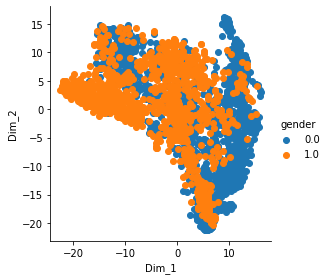

In [104]:
from sklearn.manifold import TSNE
import seaborn as sn
model1 = TSNE(n_components=2, random_state=0, perplexity=150)
tsne_data = model1.fit_transform(x_train1) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train1)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "gender"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="gender", size=4).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#plt.title('With perplexity = 200')
plt.savefig(r'C:\Users\CET_Pc\Desktop\gender.tiff', dpi=300)
plt.show()

C:\Users\CET_Pc\Anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


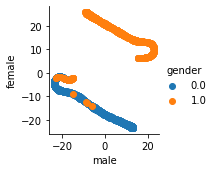

In [120]:
from sklearn.manifold import TSNE
tsne_data = model.predict(x_train1)
tsne_data = TSNE(n_components=2, perplexity=150).fit_transform(tsne_data)
import matplotlib.pyplot as pltt

#tsne_data = model1.fit_transform(x_train1) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train1)).T
tsne_df = pd.DataFrame(tsne_data, columns=("male", "female", "gender"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="gender", size=2.5).map(plt.scatter, 'male', 'female').add_legend()
#plt.title('With perplexity = 200')
plt.savefig(r'C:\Users\CET_Pc\Desktop\gender-test.tiff', dpi=300)
plt.show()